# Arboles de decisión y random forest

In [1]:
# Importamos las librerias principales
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Utilizaremos el **dataset Titanic** de Standford: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

In [2]:
# Cargamos dataset a utilizar
df = pd.read_csv("https://raw.githubusercontent.com/sharonmaygua/decisonTrees/main/student-mat.csv", sep = ",")

In [3]:
# Visualizacion del DataFrame
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


##Limpieza de datos

In [7]:
# Ver si existen datos nulos en el dataset
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Exploración de datos

In [9]:
# Descripción de las variables numéricas
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
# Correlacion entre las variables numéricas
df.corr()

<ipython-input-10-27ea696f85f5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [11]:
# Ver los valores unicos que hay en cada variable categorica 
categorical_features = [name for name in df.columns if df[name].dtype == 'object']
for x in categorical_features:
  print(x," = ",df[x].unique())

school  =  ['GP' 'MS']
sex  =  ['F' 'M']
address  =  ['U' 'R']
famsize  =  ['GT3' 'LE3']
Pstatus  =  ['A' 'T']
Mjob  =  ['at_home' 'health' 'other' 'services' 'teacher']
Fjob  =  ['teacher' 'other' 'services' 'health' 'at_home']
reason  =  ['course' 'other' 'home' 'reputation']
guardian  =  ['mother' 'father' 'other']
schoolsup  =  ['yes' 'no']
famsup  =  ['no' 'yes']
paid  =  ['no' 'yes']
activities  =  ['no' 'yes']
nursery  =  ['yes' 'no']
higher  =  ['yes' 'no']
internet  =  ['no' 'yes']
romantic  =  ['no' 'yes']


In [4]:
# Eliminamos las columnas que no aportan al modelo
columns_to_drop = ['Mjob',	'Fjob',	'reason',	'nursery']
df.drop(columns_to_drop, axis=1, inplace=True)

In [13]:
# Analizamos el shape del objeto
print(df.shape)

(395, 29)


In [14]:
# Visualizamos los tipos de datos
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [6]:
# Hot encoding
categorical_features = [name for name in df.columns if df[name].dtype == 'object']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(categorical_features):
    df[i]=le.fit_transform(df[i])

In [16]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,1,2,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,1,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,1,1,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,1,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,0,1,...,4,3,2,1,2,5,4,6,10,10


In [79]:
df.dtypes

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [32]:
# Ver que varibles estan mas correlacionadas
corr = df.corr()
corr.G3.sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
romantic     -0.129970
traveltime   -0.117142
schoolsup    -0.082788
guardian     -0.070109
health       -0.061335
Pstatus      -0.058009
Dalc         -0.054660
Walc         -0.051939
school       -0.045017
famsup       -0.039157
freetime      0.011307
activities    0.016100
absences      0.034247
famrel        0.051363
famsize       0.081407
studytime     0.097820
internet      0.098483
paid          0.101996
sex           0.103456
address       0.105756
Fedu          0.152457
higher        0.182465
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

## Entrenamiento de árbol de decisión con scikit-learn

In [7]:
# Separamos en X e y
X = df[['studytime','failures', 'absences', 'G1', 'G2']]
y = df.G3

In [8]:
# Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

# 30% para test y 70% para train
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.30, random_state = 00000)

In [9]:
# Arbol de Decision
from sklearn.tree import DecisionTreeRegressor

# Creacion del modelo
tree = DecisionTreeRegressor() # parametros

In [10]:
# Entrenamiento
tree.fit(X_train,y_train)

DecisionTreeRegressor()

## Evaluación del modelo

In [11]:
#Calculo de las predicciones en Train y Test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score
print(tree.score(X_test,y_test))

0.7611534348991871


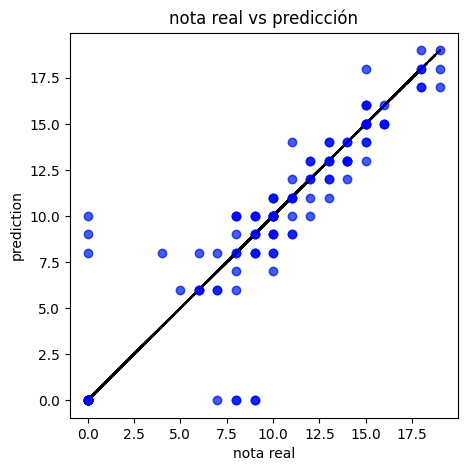

In [27]:
fig = plt.figure(figsize=(5, 5))

plt.errorbar(y_test, y_test_pred, fmt='o', color='blue', alpha=0.5)
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.scatter(y_test, y_test_pred, alpha=0.5)

plt.xlabel('nota real')
plt.ylabel("prediction")
plt.title("nota real vs predicción")
plt.show()

In [14]:
#Calculo de metricas 
from sklearn import metrics
from sklearn.metrics import r2_score
print('MSE', metrics.mean_squared_error(y_test,y_test_pred))
print('R2 Score:',r2_score(y_test , y_test_pred))

MSE 6.670634920634922
R2 Score: 0.7611534348991871


#Random Forest

In [17]:
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

rf = ensemble.RandomForestRegressor()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)
print(rf.score(X_test,y_test))

0.8393639898150145


Text(0.5, 1.0, 'nota real vs predicción')

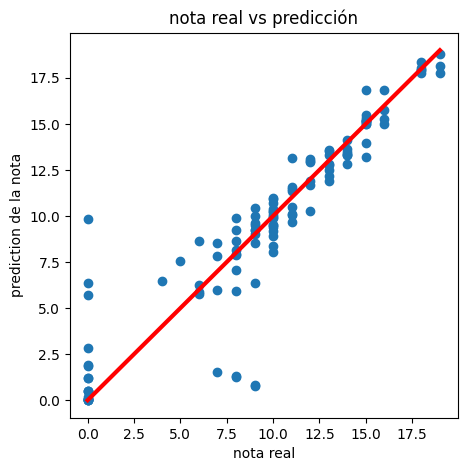

In [25]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_rf)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', linewidth=3)
plt.xlabel('nota real')
plt.ylabel("prediction")
plt.title("nota real vs predicción")

In [19]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo
random_forest = RandomForestClassifier(n_estimators=6, random_state=00000)

In [20]:
#Entrenamiento
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=6, random_state=0)

In [21]:
#Calculo de las predicciones en Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

In [22]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy en train es:', train_accuracy)
print('El accuracy en test es:', test_accuracy)

El accuracy en train es: 0.8985507246376812
El accuracy en test es: 0.42016806722689076


In [23]:
# Verificamos el feature importances
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": random_forest.feature_importances_}).sort_values("importance", ascending = False)

# Mostrar
feature_importances_df

,feature,importance
4,G2,0.350505
3,G1,0.244254
2,absences,0.240814
0,studytime,0.113112
1,failures,0.051314


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'G2'),
  Text(1, 0, 'G1'),
  Text(2, 0, 'absences'),
  Text(3, 0, 'studytime'),
  Text(4, 0, 'failures')])

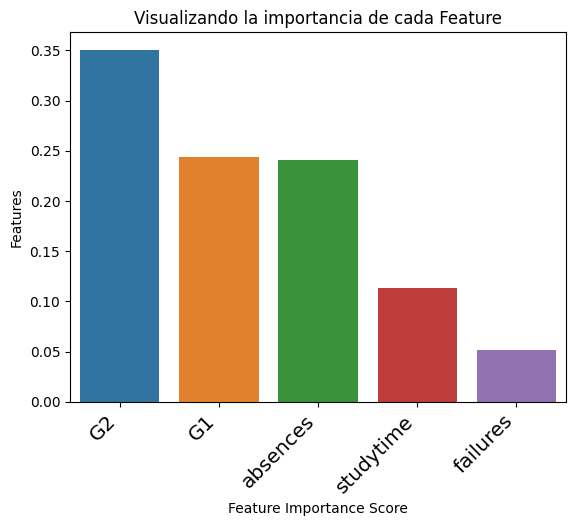

In [24]:
#Visualizacion feature importances
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizando la importancia de cada Feature")
plt.xticks(rotation=45, horizontalalignment = "right", fontweight="light", fontsize="x-large")

#Referencias
Plazti course : Curso de Decision Trees y Random Forest con Python y scikit-learn

https://www.kaggle.com/code/deepmalviya7/grade-prediction-using-lr-dt-rf-0-88-r2-score

https://www.kaggle.com/datasets/dipam7/student-grade-prediction?resource=download